## 1. Data Preprocessing

## Overview

Practice for Data Analytic Class in Merdeka Belajar 

## Objecive

• Retrieving data 

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


**About Dataset**

Consists of names, locations and height (in meters and feet) for various mountains around the world.

This is intended as a static (unchanging) snapshot of https://www.kaggle.com/datasets/codefantasy/list-of-mountains-in-the-world. It was created in 2022. 

Dataset description & download https://www.kaggle.com/datasets/codefantasy/list-of-mountains-in-the-world.

**1.1 Importing Library**

**To Import the Library, then use the following packages syntax**

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

**1.2 Importing Dataset**

**To Import the Dataset, then upload it to a file then enter the csv file. and use the following syntax to import the uploaded dataset**

In [63]:
import pandas as pd
dataset = pd.read_csv('Mountain.csv')
dataset

,Mountain,Metres,Feet,Range,Location
0,Mount Everest,8848.00,29029,Himalayas,Nepal/China
1,K2,8612.00,28255,Karakoram,Pakistan/China
2,Kangchenjunga,8586.00,28169,Himalayas,Nepal/India
3,Lhotse,8516.00,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485.00,27838,Himalayas,Nepal
...,...,...,...,...,...
1640,Mount Pleasant,5.00,16,,"Texas, US – Shortest Mountain in Texas"
1641,Mount Tenpō,4.53,15,,"Osaka, Japan"
1642,Tianzhong Mountain,3.60,12,,"Henan Province, China"
1643,Mount Hiroyama,3.00,10,,"Sendai, Japan – Shortest Mountain in Japan"




```
`[# Ini diformat sebagai kode](https:// [teks link](https://))`
```

## 2. Exploratory Data

**dataset.shape is used to determine the number of rows and columns in the dataset. and the number of rows of datasets is 1645 and the number of columns is 5**

In [64]:
dataset.shape

(1645, 5)

**dataset.columns is used to find out the name of the category in the column**

In [65]:
dataset.columns

Index(['Mountain', 'Metres', 'Feet', 'Range', 'Location'], dtype='object')

**dataset.dtypes is used to display the data types in the dataset column. such as Mountain has an object data type, Metres has a float64 data type, Feet has an int64 data type, Range and location have an object data type.**

In [66]:
dataset.dtypes

Mountain     object
Metres      float64
Feet          int64
Range        object
Location     object
dtype: object

**Dataset.info is used to display the length of the data in the dataset column and its data type.**

In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Mountain  1645 non-null   object 
 1   Metres    1645 non-null   float64
 2   Feet      1645 non-null   int64  
 3   Range     498 non-null    object 
 4   Location  1530 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 64.4+ KB


**dataset.nunique is used to get the number of unique values ​​in each dataset column.**

In [68]:
dataset.nunique()

Mountain    1621
Metres      1448
Feet        1447
Range        111
Location     777
dtype: int64

**2.1 Handling Missing Value**

Let's assume unknown value as missing value since unknown means not known or no values

**Datasets.isnull().sum() is used to get the number of missing (null) values ​​in each dataset column. it is known that the data range and location each have missing values, namely 1147 and 115**

In [69]:
dataset.isnull().sum()

Mountain       0
Metres         0
Feet           0
Range       1147
Location     115
dtype: int64


**To get data type from column 'Range' in dataset.**

In [70]:
dataset['Range'].dtypes

dtype('O')

**To get data type from column 'Location' in dataset.**

In [71]:
dataset['Location'].dtypes

dtype('O')

Perform imputer to handle missing value in numerical data

**in this case because the missing value in the dataset is in the form of an object, it does not use this syntax.**

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

In [ ]:
imputer = imputer.fit(dataset[['']])
imputer

In [ ]:
dataset[['']] = imputer.transform(dataset[['']])
dataset.isnull().sum()

**Using drop column tohandle missing value on categorical or object data**

**it can be seen that the missing value in the dataset has been lost.**

In [73]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

Mountain    0
Metres      0
Feet        0
dtype: int64

drop datetime column since we don't need it, we will use it in the next lecure for forecasting time series data

**dataset = dataset.drop is used to remove unnecessary or unnecessary columns.**

In [14]:
dataset = dataset.drop('Mountain', axis=1)
dataset

,Metres,Feet
0,8848.00,29029
1,8612.00,28255
2,8586.00,28169
3,8516.00,27940
4,8485.00,27838
...,...,...
1640,5.00,16
1641,4.53,15
1642,3.60,12
1643,3.00,10


## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

for more info: https://www.scribbr.com/statistics/outliers/

**dataset.describe is used to view data numerically**

In [15]:
dataset.describe()

,Metres,Feet
count,1645.000000,1645.000000
mean,3570.258705,11713.444377
std,1982.570769,6504.502838
min,0.600000,2.000000
25%,2133.000000,6998.000000
50%,3356.000000,11010.000000
75%,4442.000000,14573.000000
max,8848.000000,29029.000000


**mathplotlib is used to display data visualization using mathplotlib**

**In the diagram it is known that there are quite far outliers, namely in the category of feet**

<Axes: >

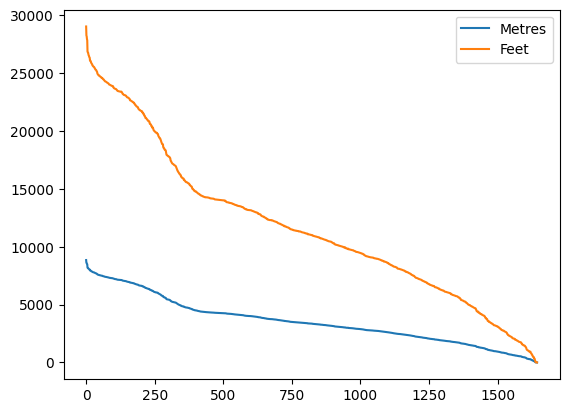

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

**The syntax below is almost the same, which is used to see if there are outliers in the data in the form of a box plot.**

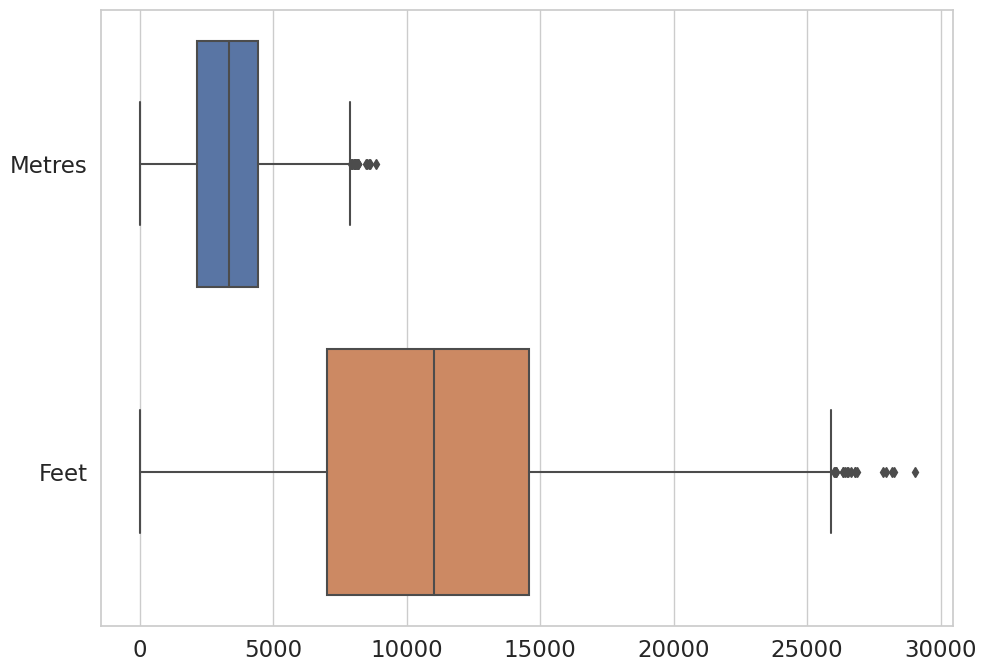

In [17]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

**we can be seen in the box plot feet above there are points that are far away compared to the other points, which means that there are outliers in the feet.**

**Scatter plots are used to display whether there are outliers but in the form of points/plots which are also called dot point.**

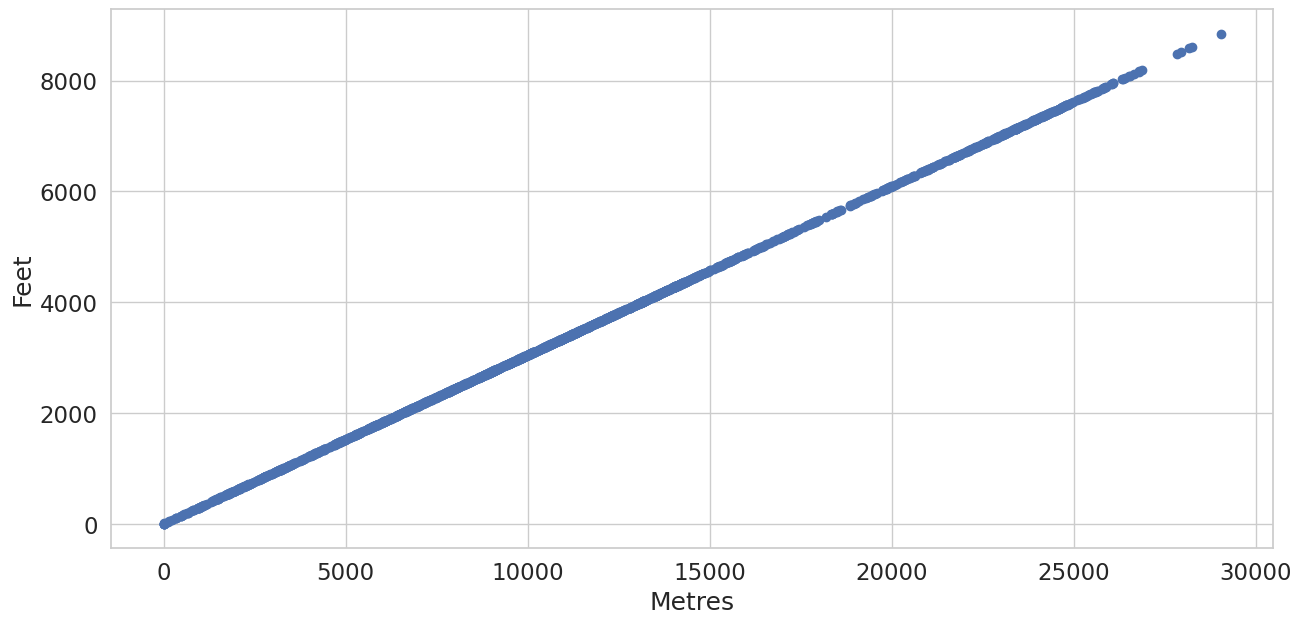

In [18]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Feet'], dataset['Metres'])
 
# x-axis label
ax.set_xlabel('Metres')
 
# y-axis label
ax.set_ylabel('Feet')
plt.show()

**We can see in the diagram above that there are points that are quite far away, which means there are indeed outliers.**

**Removing the outliers using IQR**

**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1

Quartile description: https://rumusbilangan.com/rumus-kuartil/


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

how to calculate IQR:

https://www.timesmojo.com/what-is-the-15-iqr-rule/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

**data cleaning was carried out using IQR and it can be seen that the initial dataset size has been reduced to 2 and with a data length of 1645.**

In [19]:
import sklearn

# IQR Price
Q1 = np.percentile(dataset['Feet'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['Feet'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (1645, 2)


**Clean out the outliers using the syntax below. and the result is that the length of the data is 1627.**

In [20]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Feet'] > upper].index
outliers_lower = dataset[dataset['Feet'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (1627, 2)


**data cleaning was carried out using IQR and it can be seen that the initial dataset size has been reduced to 2 and with a data length of 1627.**

In [21]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['Metres'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['Metres'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (1627, 2)


**Clean out the outliers using the syntax below. and the result is that the length of the data is 1615.**

In [22]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Metres'] > upper].index
outliers_lower = dataset[dataset['Metres'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (1615, 2)


**visualize again to make sure by using the box plot, and we can see that the data is clean of outliers.**

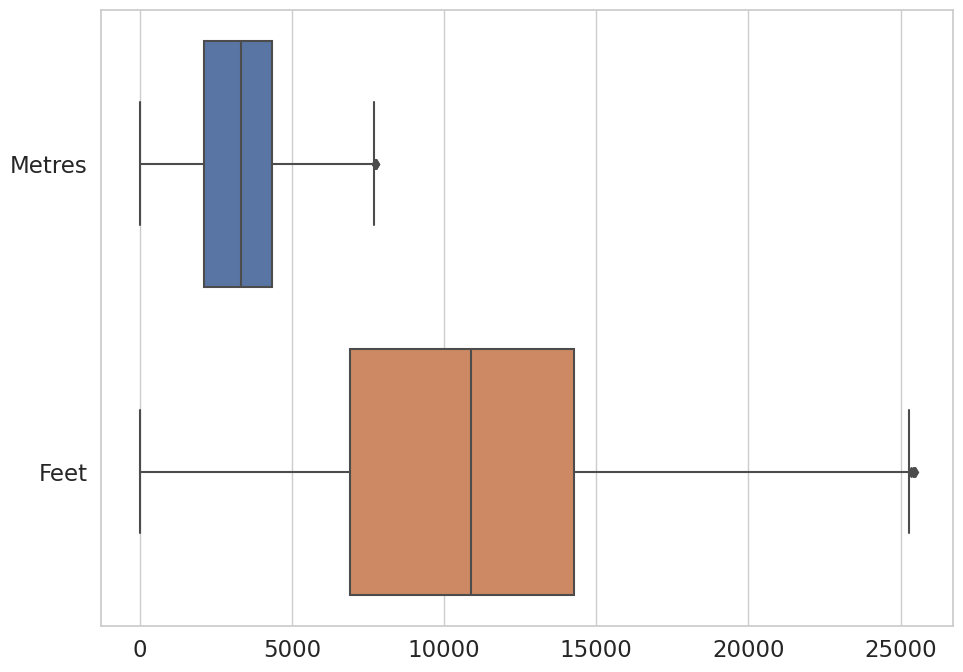

In [23]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

**visualize again to make sure by using the Scatter plot, and we can see that the data is clean of outliers.**

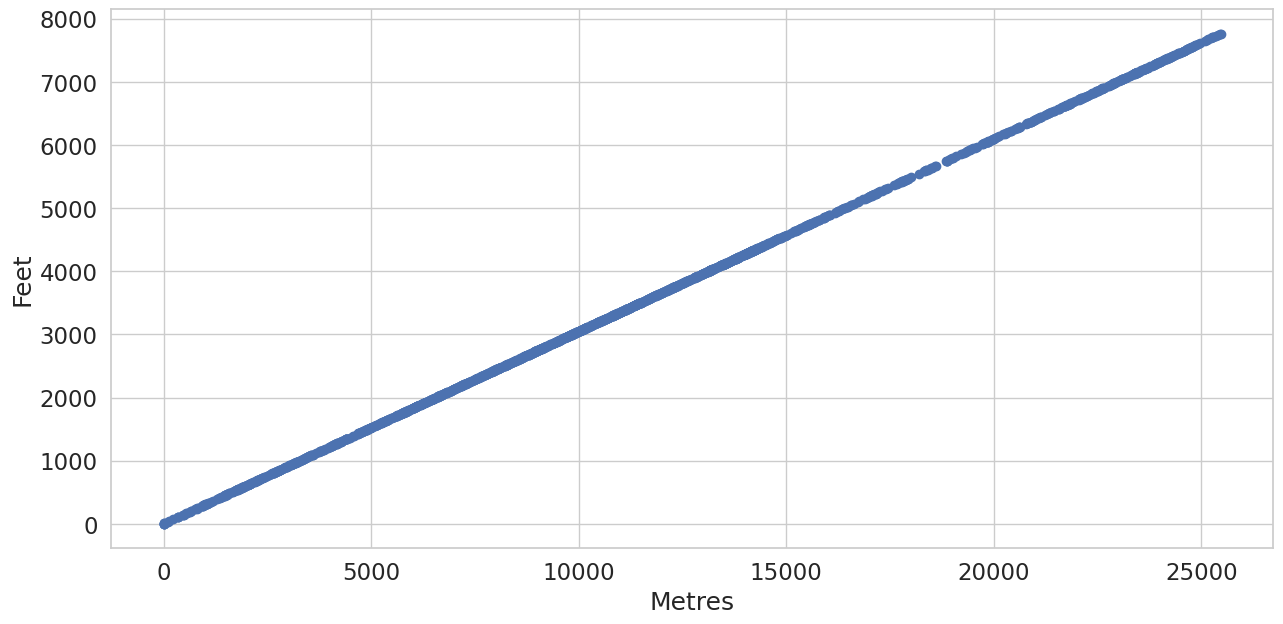

In [24]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Feet'], dataset['Metres'])
 
# x-axis label
ax.set_xlabel('Metres')
 
# y-axis label
ax.set_ylabel('Feet')
plt.show()

Show data distribution based on density (kde - kernel density estimation)

**looking at the data density using kde, you can see that the graph is converging in the middl**

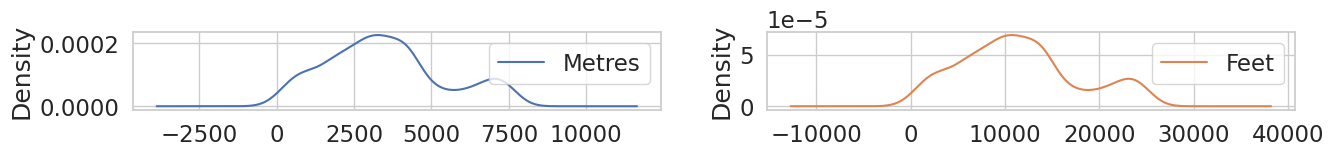

In [25]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Show data distribution based on histogram

**Display data functions based on bar charts (histograms). We can see that feet have a varied histogram because feet have the most missing values.**

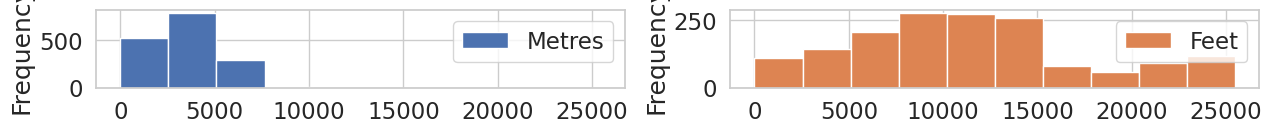

In [26]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

**Then display it in line form.**

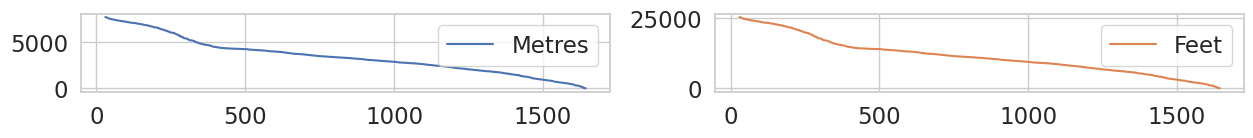

In [27]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

**3.2 CORRELATION MATRIX**

**then check the correlation matrix using a scatter plot.**

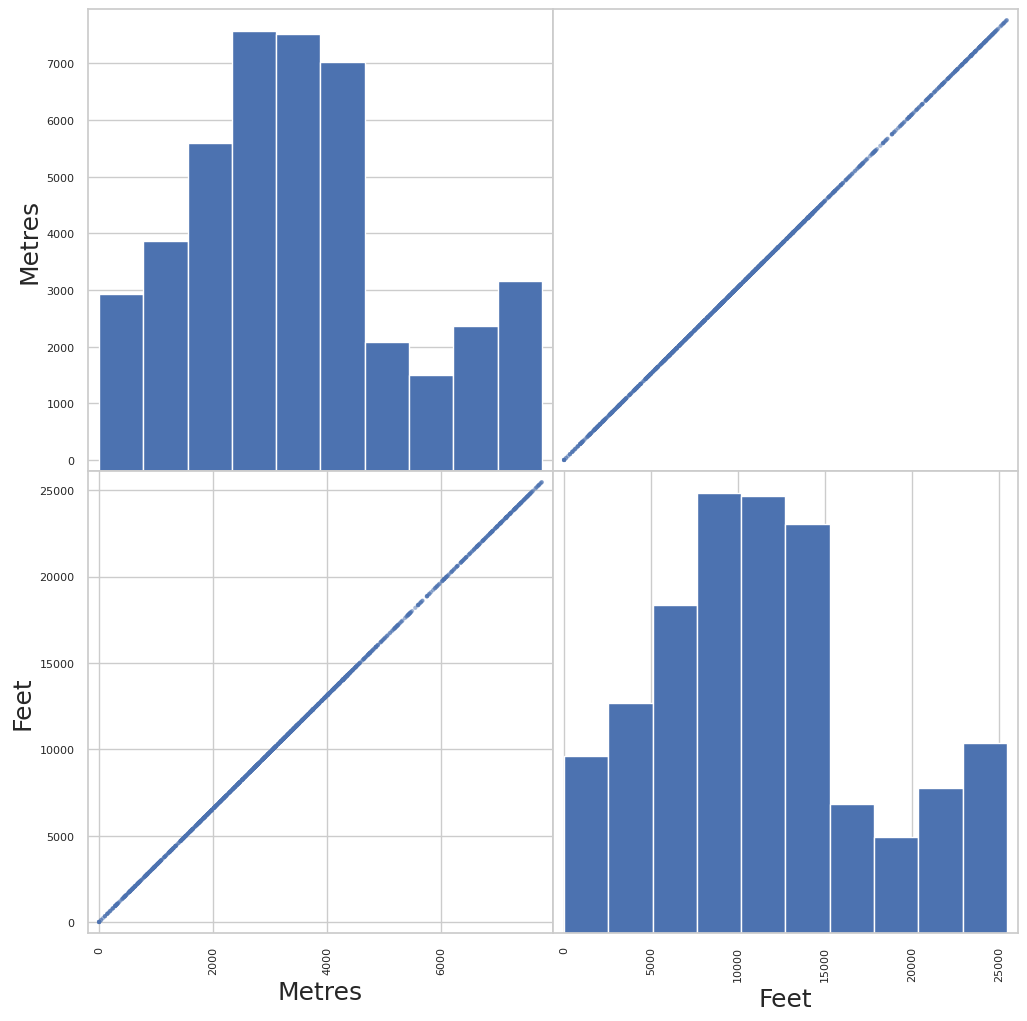

In [28]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

**correlation matrix with heatmap**



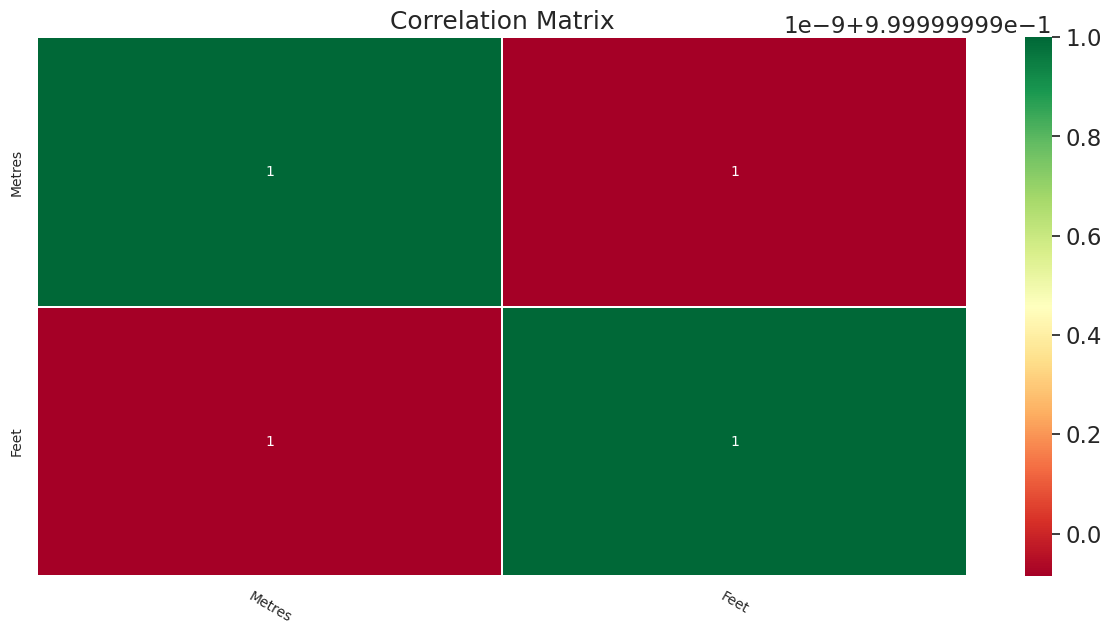

In [29]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

**4. Splitting Dataset**

**4.1 Slicing**

We define x and y as x for data and y for label

**The metres will be labels. and other than meters will be the input data.**

In [40]:
x = dataset.drop('Metres', axis=1)
x

,Feet
30,25466
31,25446
32,25400
33,25358
34,25295
...,...
1640,16
1641,15
1642,12
1643,10


Choose feature Type as a label

In [41]:
y = dataset["Metres"]
y

30      7762.00
31      7756.00
32      7742.00
33      7729.00
34      7710.00
         ...   
1640       5.00
1641       4.53
1642       3.60
1643       3.00
1644       0.60
Name: Metres, Length: 1615, dtype: float64

In [42]:
y.values.reshape(-1,1)

array([[7.762e+03],
       [7.756e+03],
       [7.742e+03],
       ...,
       [3.600e+00],
       [3.000e+00],
       [6.000e-01]])

**4.2 Categorical Encoding**

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

**Do the transform first using the dummies function**

In [43]:
x = pd.get_dummies(x)
x

,Feet
30,25466
31,25446
32,25400
33,25358
34,25295
...,...
1640,16
1641,15
1642,12
1643,10


In [44]:
x.shape

(1615, 1)

**4.2.1 Standarization**

Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

Thus, by this the data set becomes self explanatory and easy to analyze as the mean turns down to 0 and it happens to have an unit variance.

References: https://www.askpython.com/python/examples/standardize-data-in-python#:~:text=Ways%20to%20Standardize%20Data%20in%20Python%201%201.,load_iris%20...%202%202.%20Using%20StandardScaler%20%28%29%20function

In [45]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0
0,2.247311
1,2.244106
2,2.236736
3,2.230006
4,2.219912
...,...
1610,-1.830409
1611,-1.830570
1612,-1.831050
1613,-1.831371


**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


In [46]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0
0,1.000000
1,0.999215
2,0.997408
3,0.995759
4,0.993285
...,...
1610,0.000550
1611,0.000511
1612,0.000393
1613,0.000314


**4.3 Splitting**

In [74]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1, stratify=y)

**data distribution for train & test is displayed on the data. and get Train distribution Counter({1: 267, 0: 267, 2: 266}) & Test distribution Counter({0: 67, 2: 67, 1: 66})**

In [75]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({1: 267, 0: 267, 2: 266})
Test distribution Counter({0: 67, 2: 67, 1: 66})


This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For more: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

In [76]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [77]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.751250 (0.053165)


In [78]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

LogisticRegression()

In [79]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

0.685


[[67  0  0]
 [ 0 34 32]
 [ 0 31 36]]


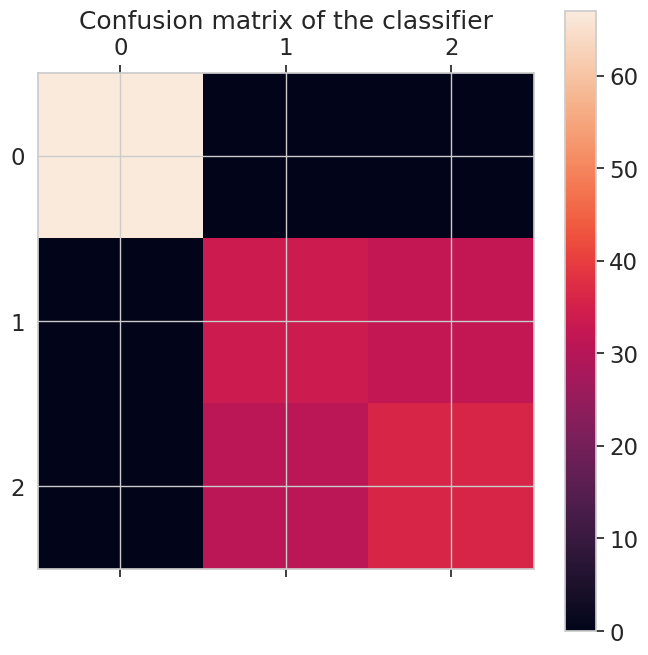

In [80]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [81]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.52      0.52      0.52        66
           2       0.53      0.54      0.53        67

    accuracy                           0.69       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.68      0.69      0.68       200

